In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
class_data = pd.read_pickle('all_data_processed_0817.pkl')
count_dic = {}
for c in list(class_data['label'].to_list()):
    if c in count_dic.keys():
        count_dic[c] += 1
    else:
        count_dic[c] = 1
sorted_dict_desc = dict(sorted(count_dic.items(), key=lambda item: item[1], reverse=True))
# print("按值降序排序后的字典：", sorted_dict_desc)
total = sum(sorted_dict_desc.values())
proportion_dict = {k: v / total for k, v in sorted_dict_desc.items()}
# print(proportion_dict)

In [115]:
birth_data = pd.read_pickle('birth_date.pkl')
birth_date = {}
for idx, row in birth_data.iterrows():
    if not row['birth_time'][0].isdigit():
        pass
    else:
        birth_date[row['qid']] = row['birth_time'][:4]

new_dic = []
# keep_class = ['competition']
# keep_class = ['education', 'die', 'birth', 'military', 'marry', 'competition', 'career', 'performance', 'assembly',  'divorce']
keep_class = ['education', 'die', 'birth', 'marry', 'competition', 'career', 'performance', 'assembly']


In [116]:
for index, row in class_data.iterrows():
    # print(f"Index: {index}")
    try:
        # birth_time = birth_date[row['wikidata_code']]
        event_time = int((int(row['time']) - 1700) / 4)
        # age = int((int(event_time) - int(birth_time)) / 10)
        if event_time < 0 or event_time > 75:
            continue
        event_class = row['label']
        if event_class not in keep_class:
            event_class = 'others'
        new_dic.append((row['name'], str(event_time), event_class))
    except:
        pass

In [118]:
new_dic_df = pd.DataFrame(new_dic, columns=['qid', 'event_time', 'label'])

new_dic_df.groupby('label').count()

,qid,event_time
label,,
assembly,87916,87916
birth,689729,689729
career,739311,739311
competition,136666,136666
die,213921,213921
education,489918,489918
marry,148793,148793
others,974889,974889
performance,113113,113113


In [119]:
def get_variables_to_chart(year, keep_class):
    keep_class1 = keep_class + ['others']
    size = len(year)
    classes = []
    for i in keep_class1:
        classes.append([0] * size)
    # classes.append([0] * size)

    for i in range(size):
        temp = new_dic_df[new_dic_df['event_time'] == str(i)]
        temp = temp.groupby('label').count()

        head = temp.index.to_list()
        
        for idx, cls in enumerate(keep_class1):
            # print(idx, cls)
            if cls in head:
                classes[idx][i] = temp.loc[cls][1]
            else:
                classes[idx][i] = 0

    population_by_continent = {cls: classes[idx] for idx, cls in enumerate(keep_class1)}
    return population_by_continent


def get_variables_to_chart_percentage(year, keep_class):
    keep_class1 = keep_class + ['others']
    size = len(year)
    classes = []
    for i in keep_class1:
        classes.append([0] * size)
    # classes.append([0] * size)

    for i in range(size):
        temp = new_dic_df[new_dic_df['event_time'] == str(i)]
        temp = temp.groupby('label').count()

        head = temp.index.to_list()
        for idx, cls in enumerate(keep_class1):
            if cls in head:
                classes[idx][i] = temp.loc[cls][1]
            else:
                classes[idx][i] = 0

    all_class = np.array(classes)
    col_sums = all_class.sum(axis=0)
    percentage_array = all_class / col_sums * 100
    percentage_list = percentage_array.tolist()
    population_by_continent = {cls: percentage_list[idx] for idx, cls in enumerate(keep_class1)}
    
    return population_by_continent

# year = [
#     '[1700,1710)', '[1710,1720)', '[1720,1730)', '[1730,1740)', '[1740,1750)', '[1750,1760)', '[1760,1770)',
#         '[1770,1780)', '[1780,1790)', '[1790,1800)',
#
#     '[1800,1810)', '[1810,1820)', '[1820,1830)', '[1830,1840)', '[1840,1850)', '[1850,1860)', '[1860,1870)',
#         '[1870,1880)', '[1880,1890)', '[1890,1900)',
#
#     '[1900,1910)', '[1910,1920)', '[1920,1930)', '[1930,1940)', '[1940,1950)', '[1950,1960)', '[1960,1970)',
#         '[1970,1980)', '[1980,1990)', '[1990,2000]']

/tmp/ipykernel_32289/3799280895.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')


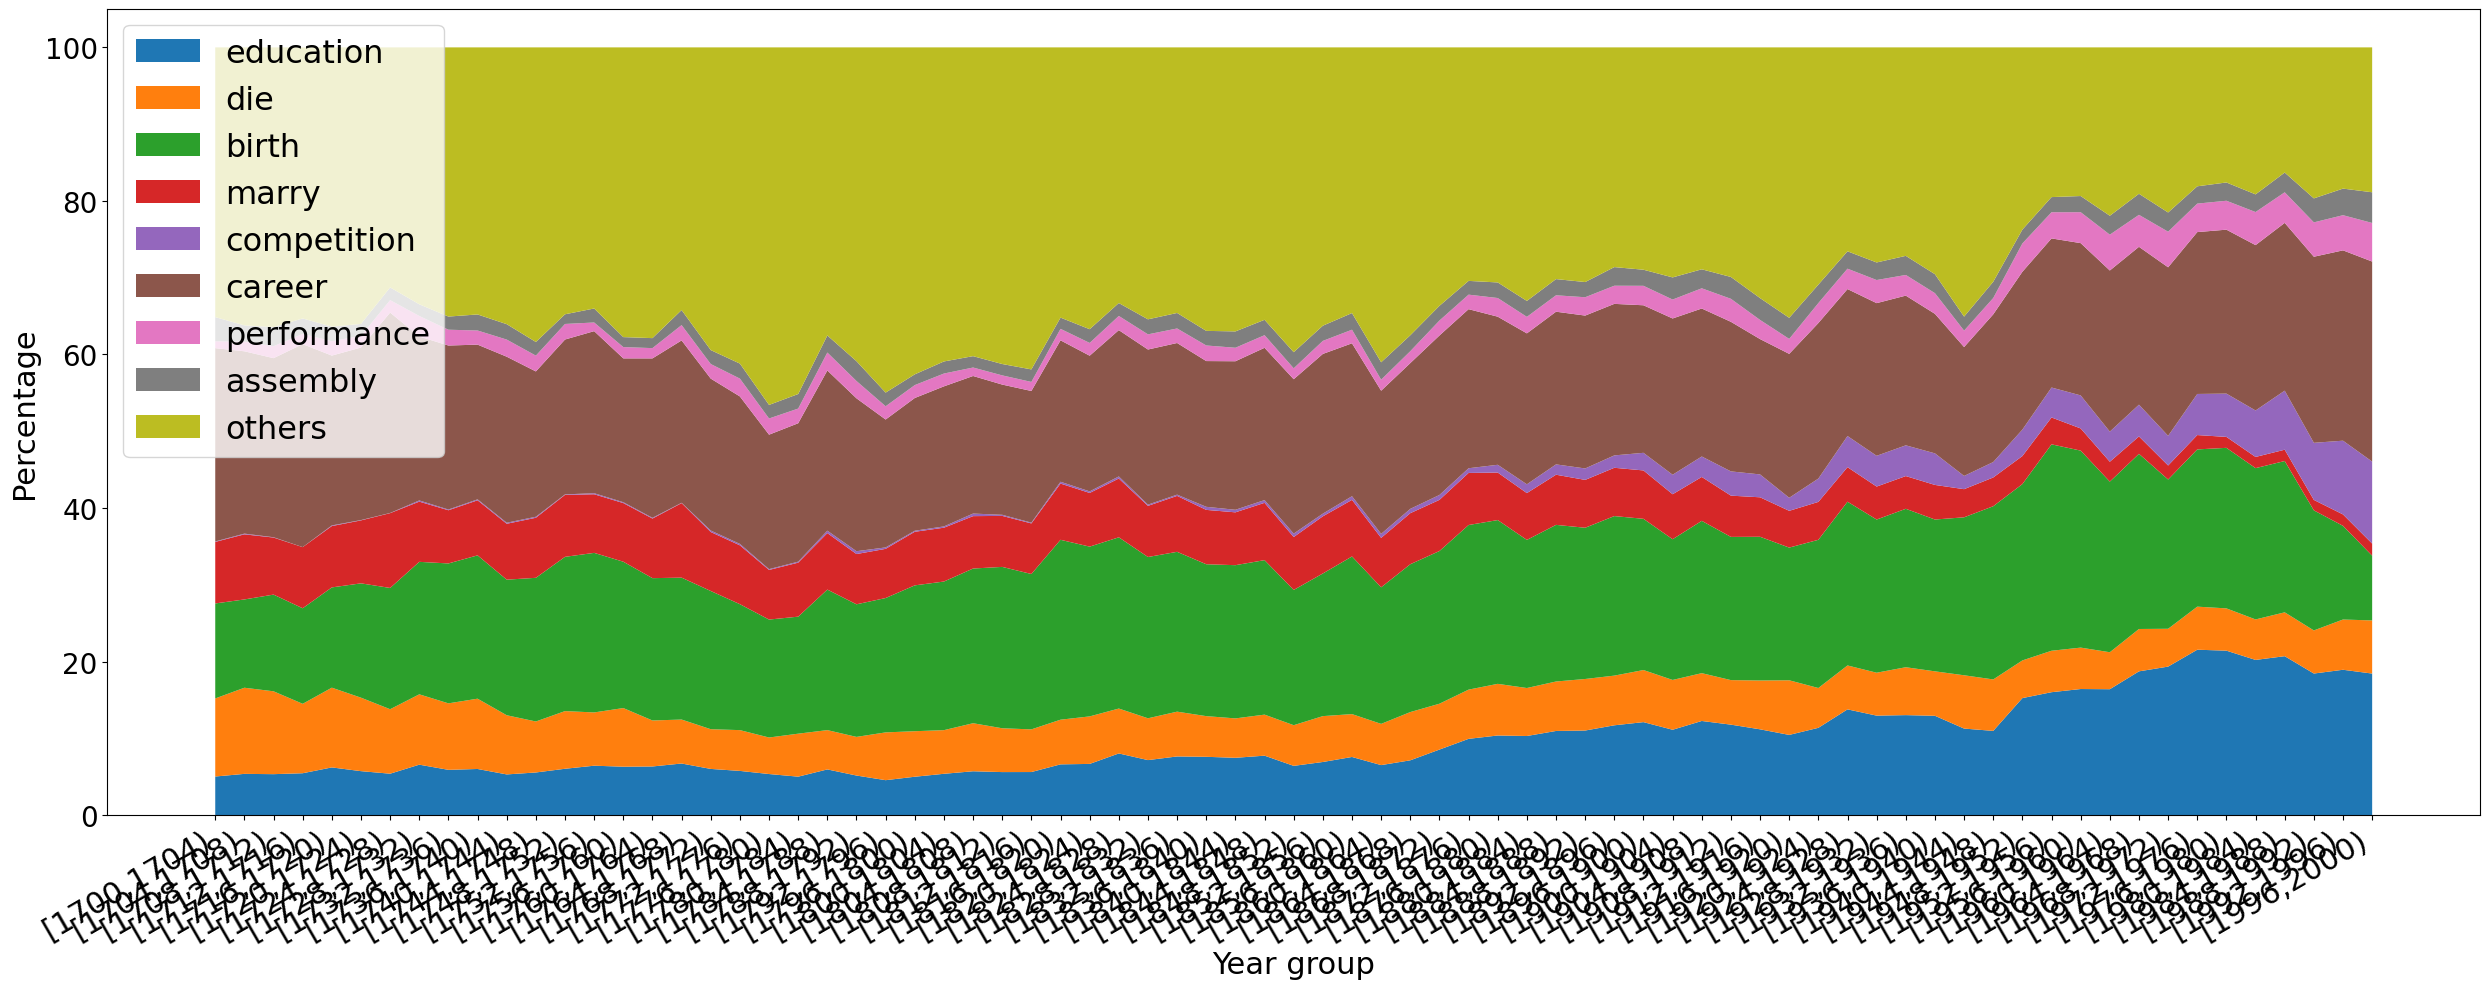

In [120]:

year = ['[' + str(1700 + i * 4) + ',' + str(1700 + (i + 1) * 4) + ')' for i in range(75)]
population_by_continent = get_variables_to_chart_percentage(year, keep_class)

fig, ax = plt.subplots(figsize=(25, 10))
ax.stackplot(year, population_by_continent.values(),
             labels=population_by_continent.keys())
ax.legend(loc='upper left',prop={'size': 23})
ax.set_xlabel('Year group', size=22)
ax.set_ylabel('Percentage', size=22)
ax.tick_params(axis='x', labelsize=22)  # 调整x轴刻度大小
ax.tick_params(axis='y', labelsize=20)  # 调整y轴刻度大小

ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
plt.tight_layout()
# plt.savefig('class_percentage.pdf', format='pdf')

/tmp/ipykernel_32289/651959313.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')


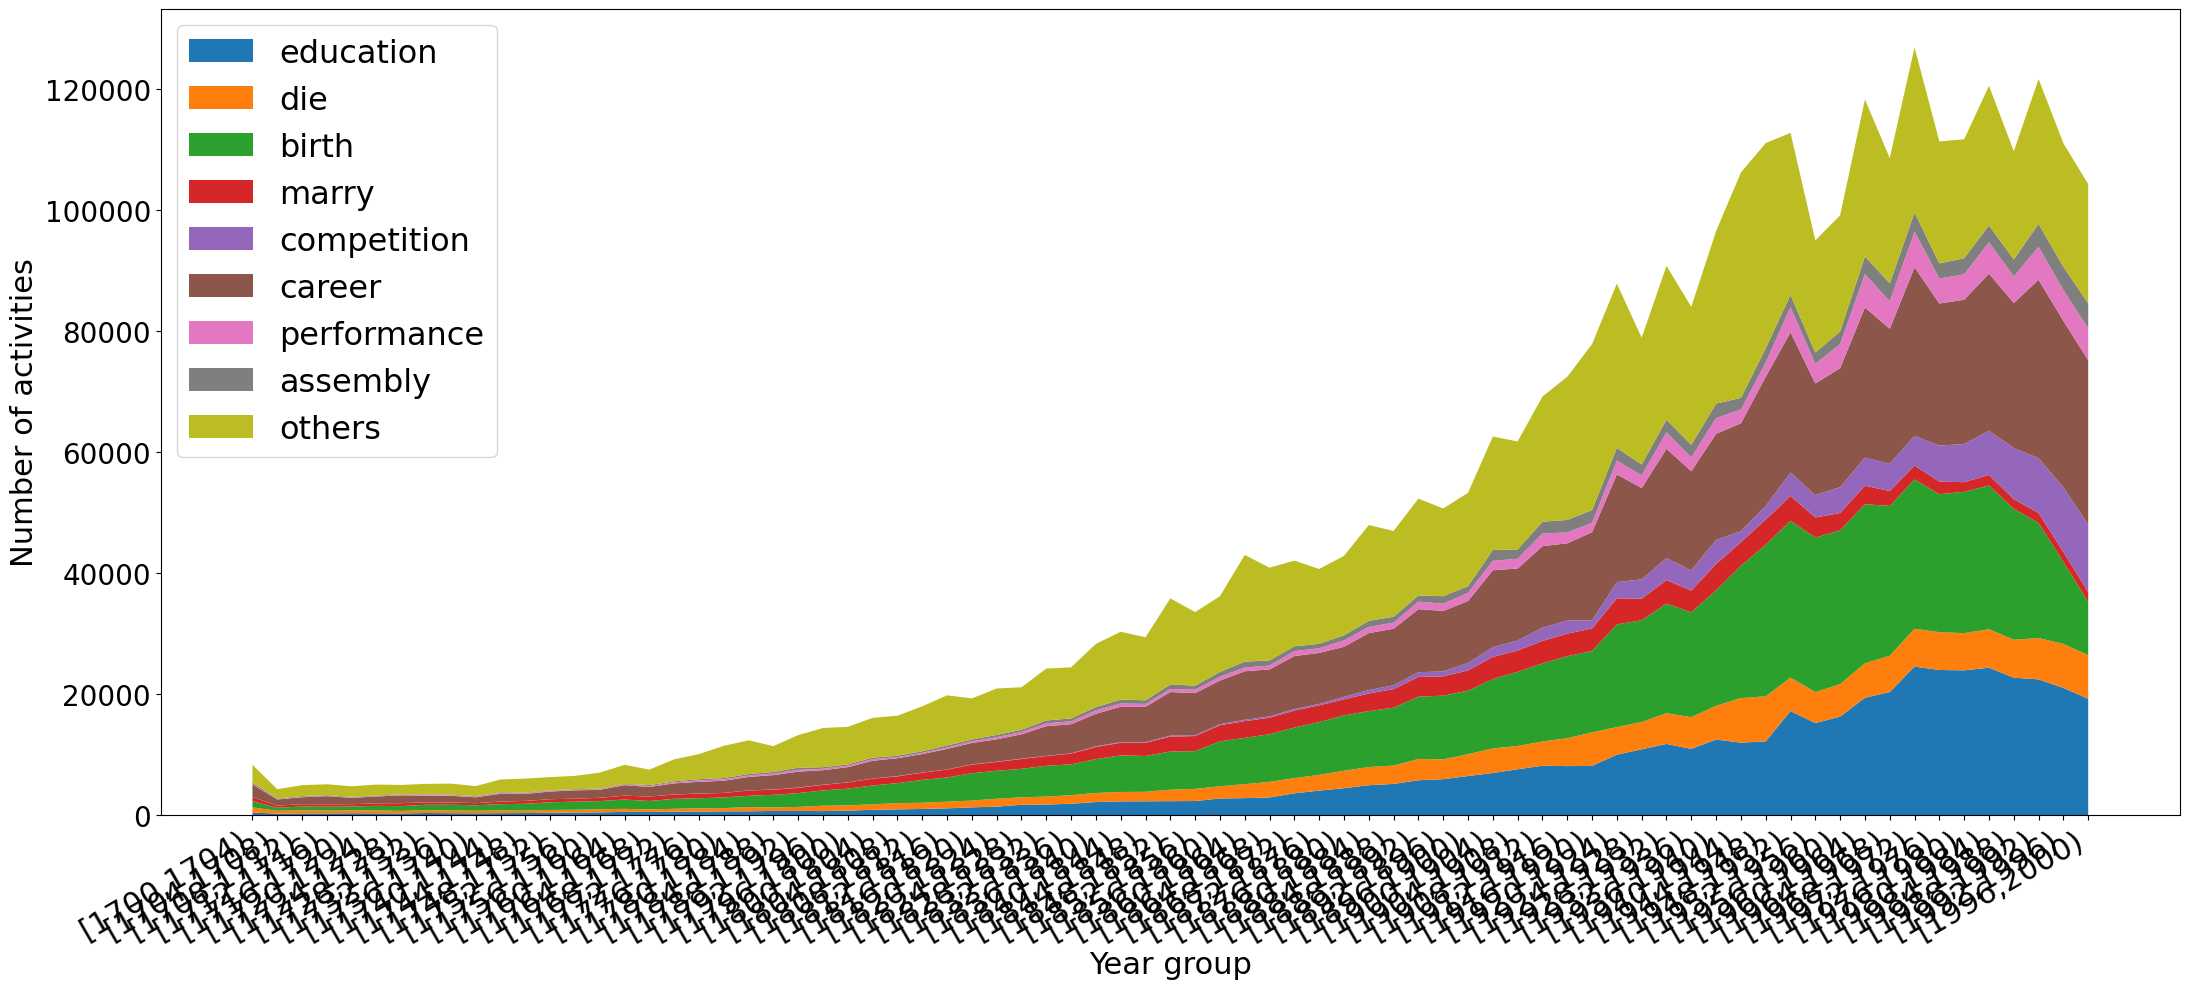

In [121]:
population_by_continent = get_variables_to_chart(year, keep_class)

fig, ax = plt.subplots(figsize=(22, 10))
ax.stackplot(year, population_by_continent.values(), labels=population_by_continent.keys())
ax.legend(loc='upper left', prop={'size': 23})
# ax.set_xticks(rotation=90)
# ax.set_title('class')
ax.set_xlabel('Year group', size=22)
ax.set_ylabel('Number of activities', size=22)
ax.tick_params(axis='x', labelsize=22)  # 调整x轴刻度大小
ax.tick_params(axis='y', labelsize=20)  # 调整y轴刻度大小
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
plt.tight_layout()

/tmp/ipykernel_32289/2823759216.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')


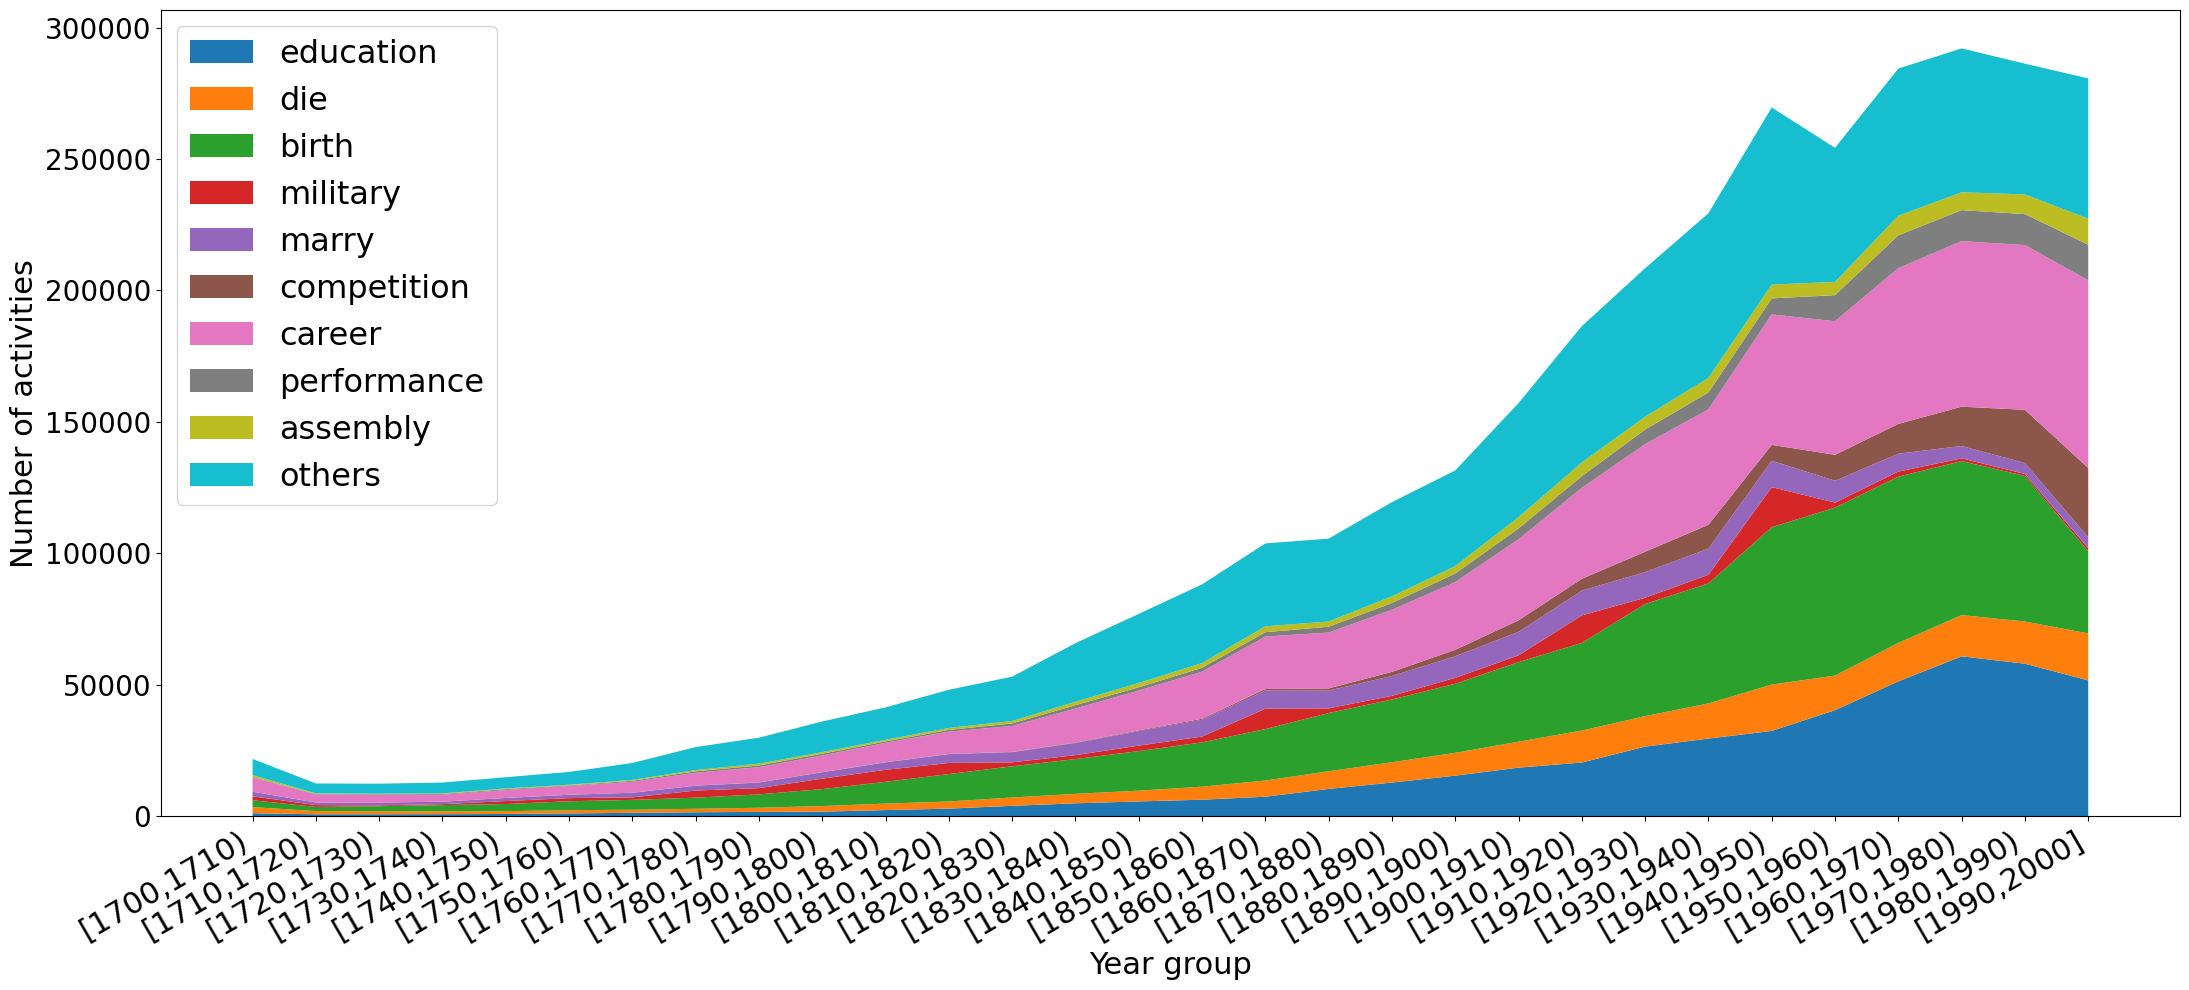

In [63]:
population_by_continent = get_variables_to_chart(year, keep_class)

fig, ax = plt.subplots(figsize=(22, 10))
ax.stackplot(year, population_by_continent.values(), labels=population_by_continent.keys())
ax.legend(loc='upper left', prop={'size': 23})
# ax.set_xticks(rotation=90)
# ax.set_title('class')
ax.set_xlabel('Year group', size=22)
ax.set_ylabel('Number of activities', size=22)
ax.tick_params(axis='x', labelsize=22)  # 调整x轴刻度大小
ax.tick_params(axis='y', labelsize=20)  # 调整y轴刻度大小
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
plt.tight_layout()
# plt.savefig('class_distribution.pdf', format='pdf')

In [9]:
# year = ['[1900,1910)','[1910,1920)','[1920,1930)','[1930,1940)','[1940,1950)','[1950,1960)','[1960,1970)','[1970,1980)','[1980,1990)', '[1990,2000]']
# # career = [0]*10
# education = [0]*10
# movement = [0]*10
# death = [0]*10
# birth = [0]*10
# military = [0]*10
# others = [0]*10
# for i in range(10):
#     temp = new_dic_df[new_dic_df['event_time'] == str(i)]
#     temp = temp.groupby('label').count()
#     military[i] = temp.loc['military'][1]
#     others[i] = temp.loc['others'][1]
#     career[i] = temp.loc['career'][1]
#     education[i] = temp.loc['education'][1]
#     movement[i] = temp.loc['movement'][1]
#     death[i] = temp.loc['death'][1]
#     birth[i] = temp.loc['birth'][1]
# 
# 
# all_class = np.array([career,education,movement,death,others,birth,military])
# col_sums = all_class.sum(axis=0)
# percentage_array = all_class / col_sums * 100
# percentage_list = percentage_array.tolist()
#
#
# population_by_continent = {
#     'birth': percentage_list[5],
#     'career': percentage_list[0],
#     'education': percentage_list[1],
#     'movement': percentage_list[2],
#     'death': percentage_list[3],
#     'military': percentage_list[6],
#     'others': percentage_list[4],
# }

/tmp/ipykernel_32289/922218992.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')


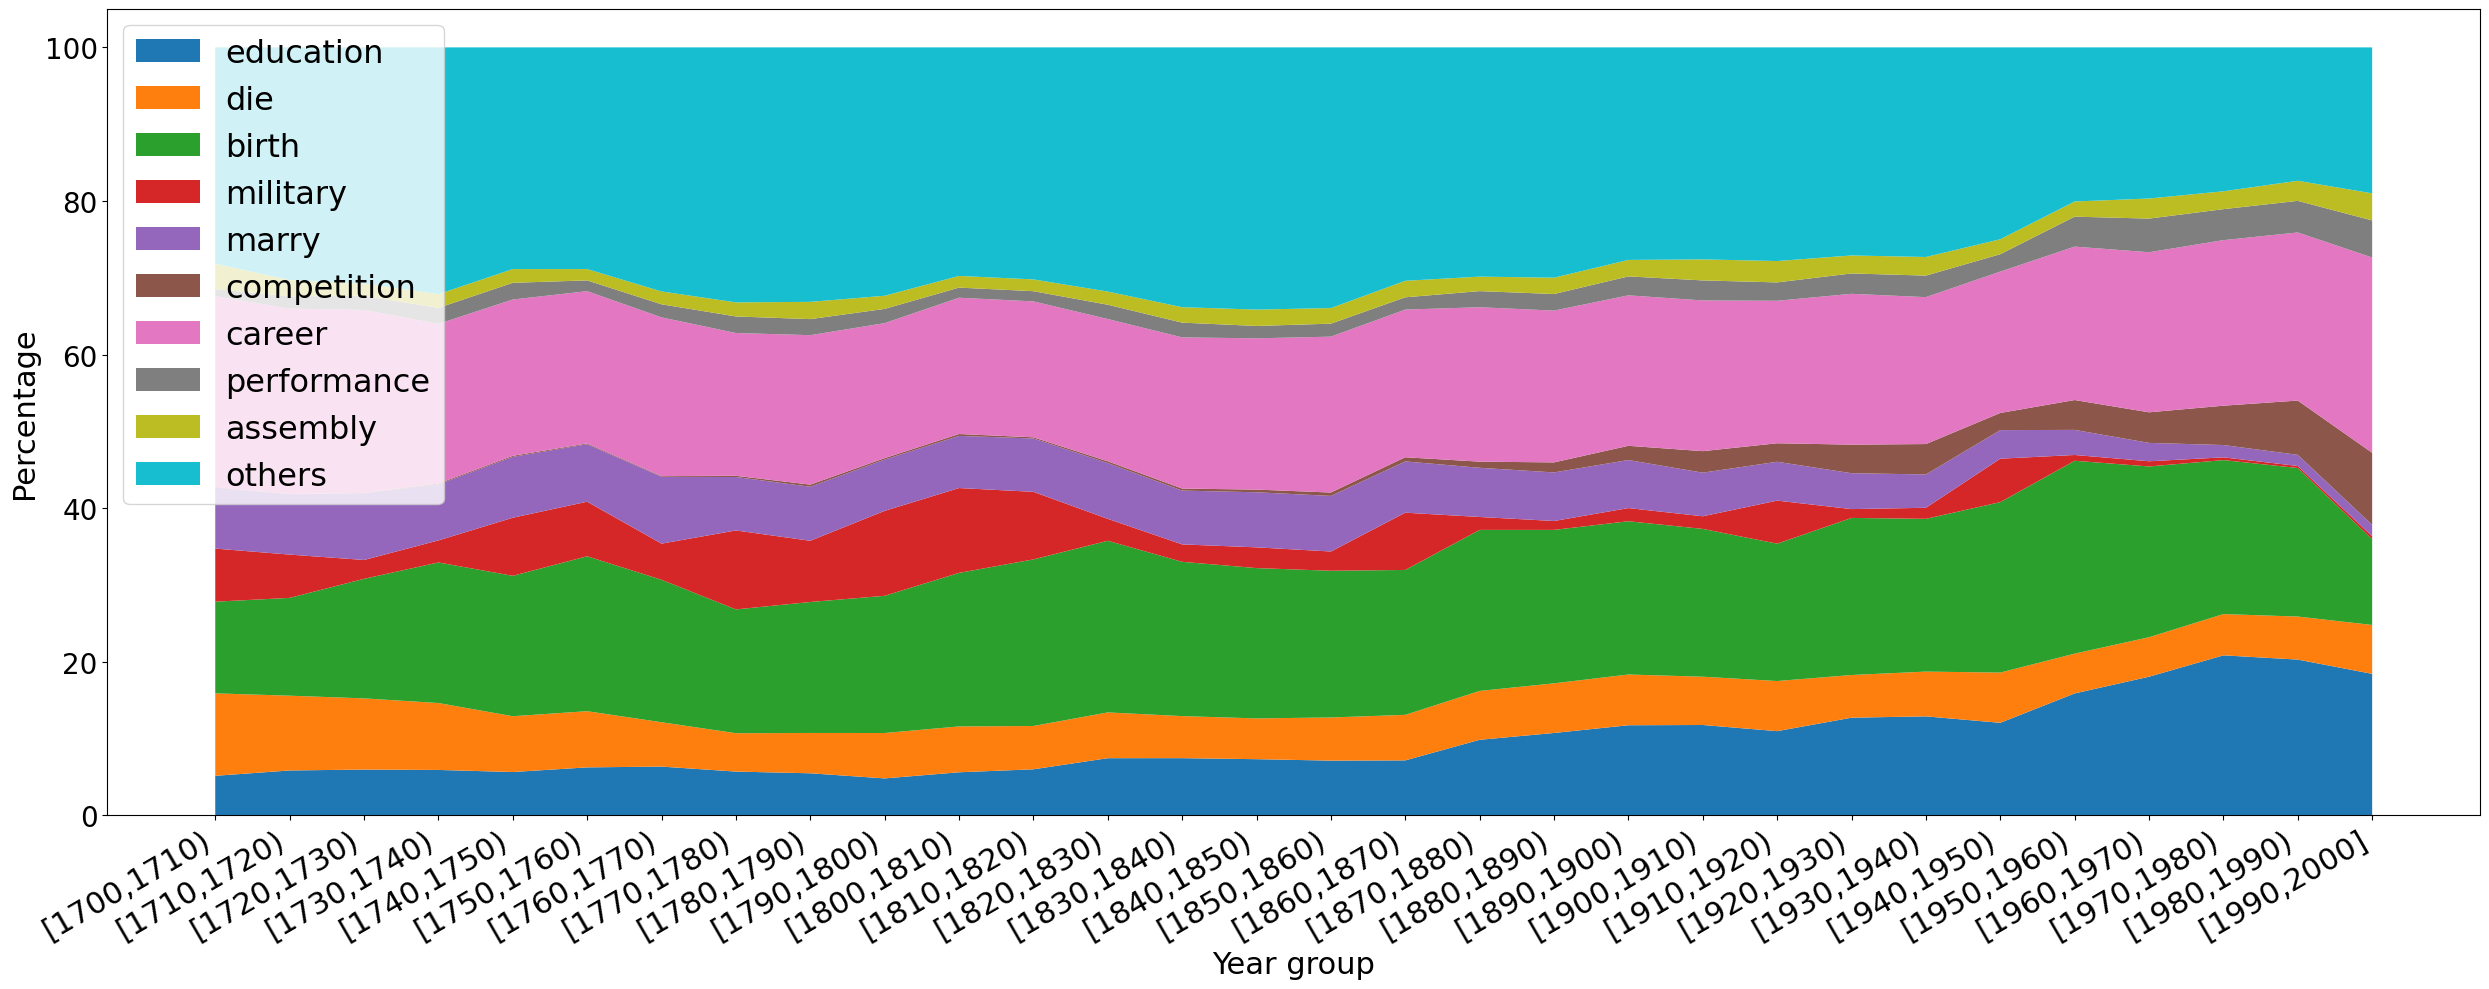

In [56]:
population_by_continent = get_variables_to_chart_percentage(year, keep_class)

fig, ax = plt.subplots(figsize=(25, 10))
ax.stackplot(year, population_by_continent.values(),
             labels=population_by_continent.keys())
ax.legend(loc='upper left',prop={'size': 23})
ax.set_xlabel('Year group', size=22) 
ax.set_ylabel('Percentage', size=22)
ax.tick_params(axis='x', labelsize=22)  # 调整x轴刻度大小
ax.tick_params(axis='y', labelsize=20)  # 调整y轴刻度大小

ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
plt.tight_layout()
# plt.savefig('class_percentage.pdf', format='pdf')